# NFL Draft Combine from 2010-2023

By Dominic Graziano

Explanation of data - this data was taken from Pro Football Reference <br>

Player = Players first and last name <br>
Pos = Position played <br>
School = university attended <br>
Ht = Measurement of height <br>
Wt = Measurement of weight <br>
40yd = timed 40 yard dash in seconds <br>
Vertical = measured vertical jump in inches <br>
Broad Jump = measured broad jump in inches <br>
3Cone = timed 3 cone drill in seconds <br>
Shuttle = timed short shuttle drill in seconds <br>
Drafted(tm-rnd-yr) = team that drafted player, the round in draft, pick number in draft, and draft year


### Merging Data Streams and Cleaning

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib import style
style.use('dark_background')
import numpy as np

In [201]:
FileNames = glob.glob('data/Combine_Results_*.csv')
print(FileNames)

['data/Combine_Results_2013.csv', 'data/Combine_Results_2012.csv', 'data/Combine_Results_2010.csv', 'data/Combine_Results_2011.csv', 'data/Combine_Results_2015.csv', 'data/Combine_Results_2014.csv', 'data/Combine_Results_2016.csv', 'data/Combine_Results_2017.csv', 'data/Combine_Results_2019.csv', 'data/Combine_Results_2018.csv', 'data/Combine_Results_2020.csv', 'data/Combine_Results_2021.csv', 'data/Combine_Results_2023.csv', 'data/Combine_Results_2022.csv']


In [202]:
combine_df = pd.concat(pd.read_csv(f) for f in FileNames)
combine_df.drop(['College','Player-additional'], axis = 1, inplace = True)
combine_df.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm-rnd-yr)
0,Oday Aboushi,OT,Virginia,6-5,308.0,5.41,23.5,17.0,100.0,7.92,4.84,New York Jets / 5th / 141st pick / 2013
1,Johnny Adams,CB,Michigan State,5-10,185.0,4.48,NaN,16.0,NaN,NaN,NaN,NaN
2,Robert Alford,CB,SE Louisiana,5-10,188.0,4.39,40.0,17.0,132.0,6.89,4.23,Atlanta Falcons / 2nd / 60th pick / 2013
3,Keenan Allen,WR,California,6-2,206.0,4.58,NaN,NaN,NaN,NaN,NaN,San Diego Chargers / 3rd / 76th pick / 2013
4,Ryan Allen,P,Louisiana Tech,6-1,229.0,4.98,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 0 to 323
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               4741 non-null   object 
 1   Pos                  4741 non-null   object 
 2   School               4741 non-null   object 
 3   Ht                   4712 non-null   object 
 4   Wt                   4717 non-null   float64
 5   40yd                 4194 non-null   float64
 6   Vertical             3731 non-null   float64
 7   Bench                3166 non-null   float64
 8   Broad Jump           3671 non-null   float64
 9   3Cone                2794 non-null   float64
 10  Shuttle              2909 non-null   float64
 11  Drafted (tm-rnd-yr)  2819 non-null   object 
dtypes: float64(7), object(5)
memory usage: 481.5+ KB


In [204]:
print('Missing Values')
for col in combine_df:
    noVal = sum(combine_df[col].isna())
    print('{}: {}'.format(col,noVal))

Missing Values
Player: 0
Pos: 0
School: 0
Ht: 29
Wt: 24
40yd: 547
Vertical: 1010
Bench: 1575
Broad Jump: 1070
3Cone: 1947
Shuttle: 1832
Drafted (tm-rnd-yr): 1922


#### Part 1: Changing the Ht column to the format I want

I want to the Ht column to be changed to inches rather than the string, so I split the column, change data types, run a calculation, then merge the foot and inch column into one column

In [205]:
combine_df['Ht'] = combine_df['Ht'].astype('string')
combine_df[['Ft_conversion', 'in']] = combine_df.Ht.str.split('-', expand = True)
combine_df = combine_df.drop('Ht', axis = 1)

In [206]:
combine_df['Ft_conversion'] = combine_df['Ft_conversion'].astype(float)
combine_df['in'] = combine_df['in'].astype(float)

combine_df['Ft_conversion'] = combine_df['Ft_conversion'] * 12

In [207]:
combine_df['Height_in_inches'] = combine_df['Ft_conversion'] + combine_df['in']

combine_df = combine_df.drop(['Ft_conversion','in'], axis = 1)

### Part 2: Splitting Drafted(tm-rnd-yr) into 4 columns

Splitting into the 4 columns and then deleting the original Drafted(tm-rnd-yr)

In [208]:
combine_df['Drafted (tm-rnd-yr)'] = combine_df['Drafted (tm-rnd-yr)'].astype('string')
combine_df[['Drafted_Team','Round_Num', 'Pick_Num', 'Year']] = combine_df['Drafted (tm-rnd-yr)'].str.split('/', expand = True)

In [209]:
combine_df = combine_df.drop('Drafted (tm-rnd-yr)', axis = 1)

I want to get the round number and pick number without the text, as well as changing the data type. Additionally changing the null values in the 4 columns 

In [210]:
combine_df['Drafted_Team'] = combine_df['Drafted_Team'].fillna('Undrafted')

combine_df['Round_Num'] = combine_df['Round_Num'].str[:2]
combine_df['Round_Num'] = combine_df['Round_Num'].fillna('0')
combine_df['Round_Num'] = combine_df['Round_Num'].astype(int)

combine_df['Pick_Num'] = combine_df['Pick_Num'].str.replace('\D+','')
combine_df['Pick_Num'] = combine_df['Pick_Num'].fillna('0')
combine_df['Pick_Num'] = combine_df['Pick_Num'].astype(int)

combine_df['Year'] = combine_df['Year'].fillna('Undrafted')

combine_df.head()

/var/folders/kf/8556syz14vn70lw4383jfz_c0000gn/T/ipykernel_80595/3617020214.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  combine_df['Pick_Num'] = combine_df['Pick_Num'].str.replace('\D+','')


,Player,Pos,School,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Height_in_inches,Drafted_Team,Round_Num,Pick_Num,Year
0,Oday Aboushi,OT,Virginia,308.0,5.41,23.5,17.0,100.0,7.92,4.84,77.0,New York Jets,5,141,2013
1,Johnny Adams,CB,Michigan State,185.0,4.48,NaN,16.0,NaN,NaN,NaN,70.0,Undrafted,0,0,Undrafted
2,Robert Alford,CB,SE Louisiana,188.0,4.39,40.0,17.0,132.0,6.89,4.23,70.0,Atlanta Falcons,2,60,2013
3,Keenan Allen,WR,California,206.0,4.58,NaN,NaN,NaN,NaN,NaN,74.0,San Diego Chargers,3,76,2013
4,Ryan Allen,P,Louisiana Tech,229.0,4.98,NaN,NaN,NaN,NaN,NaN,73.0,Undrafted,0,0,Undrafted


### Part 3: Fixing null values for the rest of the columns

In [211]:
combine_df['Wt'] = combine_df['Wt'].fillna(0)
combine_df['40yd'] = combine_df['40yd'].fillna(0)
combine_df['Vertical'] = combine_df['Vertical'].fillna(0)
combine_df['Bench'] = combine_df['Bench'].fillna(0)
combine_df['Broad Jump'] = combine_df['Broad Jump'].fillna(0)
combine_df['3Cone'] = combine_df['3Cone'].fillna(0)
combine_df['Shuttle'] = combine_df['Shuttle'].fillna(0)
combine_df['Height_in_inches'] =  combine_df['Height_in_inches'].fillna(0)

In [212]:
combine_df.head()

,Player,Pos,School,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Height_in_inches,Drafted_Team,Round_Num,Pick_Num,Year
0,Oday Aboushi,OT,Virginia,308.0,5.41,23.5,17.0,100.0,7.92,4.84,77.0,New York Jets,5,141,2013
1,Johnny Adams,CB,Michigan State,185.0,4.48,0.0,16.0,0.0,0.00,0.00,70.0,Undrafted,0,0,Undrafted
2,Robert Alford,CB,SE Louisiana,188.0,4.39,40.0,17.0,132.0,6.89,4.23,70.0,Atlanta Falcons,2,60,2013
3,Keenan Allen,WR,California,206.0,4.58,0.0,0.0,0.0,0.00,0.00,74.0,San Diego Chargers,3,76,2013
4,Ryan Allen,P,Louisiana Tech,229.0,4.98,0.0,0.0,0.0,0.00,0.00,73.0,Undrafted,0,0,Undrafted


Checking to see if we have filled all the values in, and if true we can move on

In [213]:
print('Missing Values')
for col in combine_df:
    noVal = sum(combine_df[col].isna())
    print('{}: {}'.format(col,noVal))

Missing Values
Player: 0
Pos: 0
School: 0
Wt: 0
40yd: 0
Vertical: 0
Bench: 0
Broad Jump: 0
3Cone: 0
Shuttle: 0
Height_in_inches: 0
Drafted_Team: 0
Round_Num: 0
Pick_Num: 0
Year: 0


Reorder the columns to what I want

In [214]:
combine_df = combine_df[['Player','Pos','School','Drafted_Team','Round_Num','Pick_Num','Year','Height_in_inches','Wt','40yd','Vertical','Bench','Broad Jump','3Cone','Shuttle']]
combine_df.head()

,Player,Pos,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
0,Oday Aboushi,OT,Virginia,New York Jets,5,141,2013,77.0,308.0,5.41,23.5,17.0,100.0,7.92,4.84
1,Johnny Adams,CB,Michigan State,Undrafted,0,0,Undrafted,70.0,185.0,4.48,0.0,16.0,0.0,0.00,0.00
2,Robert Alford,CB,SE Louisiana,Atlanta Falcons,2,60,2013,70.0,188.0,4.39,40.0,17.0,132.0,6.89,4.23
3,Keenan Allen,WR,California,San Diego Chargers,3,76,2013,74.0,206.0,4.58,0.0,0.0,0.0,0.00,0.00
4,Ryan Allen,P,Louisiana Tech,Undrafted,0,0,Undrafted,73.0,229.0,4.98,0.0,0.0,0.0,0.00,0.00


Noticing that there are more position names than neccessary, I wanted to simplify things by merging the positions <br>

OLB, EDGE, DE = EDGE <br>
DT, DL = IDL <br>
S, SAF = S <br>
OL, G, OG, C = IOL <br>
LB, ILB = LB <br>
CB, DB = DB <br>


In [215]:
combine_df.Pos.unique()

array(['OT', 'CB', 'WR', 'P', 'OG', 'ILB', 'RB', 'DE', 'QB', 'DT', 'FB',
       'OLB', 'S', 'K', 'C', 'TE', 'LS', 'DL', 'LB', 'EDGE', 'OL', 'DB',
       'G', 'SAF'], dtype=object)

In [216]:
combine_df.loc[combine_df['Pos'] == 'OLB','Pos'] = 'EDGE'
combine_df.loc[combine_df['Pos'] == 'DE','Pos'] = 'EDGE'
combine_df.loc[combine_df['Pos'] == 'SAF','Pos'] = 'S'
combine_df.loc[combine_df['Pos'] == 'OL','Pos'] = 'IOL'
combine_df.loc[combine_df['Pos'] == 'G','Pos'] = 'IOL'
combine_df.loc[combine_df['Pos'] == 'OG','Pos'] = 'IOL'
combine_df.loc[combine_df['Pos'] == 'C','Pos'] = 'IOL'
combine_df.loc[combine_df['Pos'] == 'ILB','Pos'] = 'LB'
combine_df.loc[combine_df['Pos'] == 'CB','Pos'] = 'DB'
combine_df.loc[combine_df['Pos'] == 'DT','Pos'] = 'IDL'
combine_df.loc[combine_df['Pos'] == 'DL','Pos'] = 'IDL'


In [217]:
combine_df.Pos.value_counts()

WR      670
EDGE    578
DB      552
IOL     448
RB      426
IDL     405
S       328
LB      313
OT      307
TE      266
QB      238
P        81
K        65
FB       42
LS       22
Name: Pos, dtype: int64

## Analysis and Visualizations

### Visualization 1: Pairplot

In [218]:
combine_df = combine_df.reset_index(drop = True)

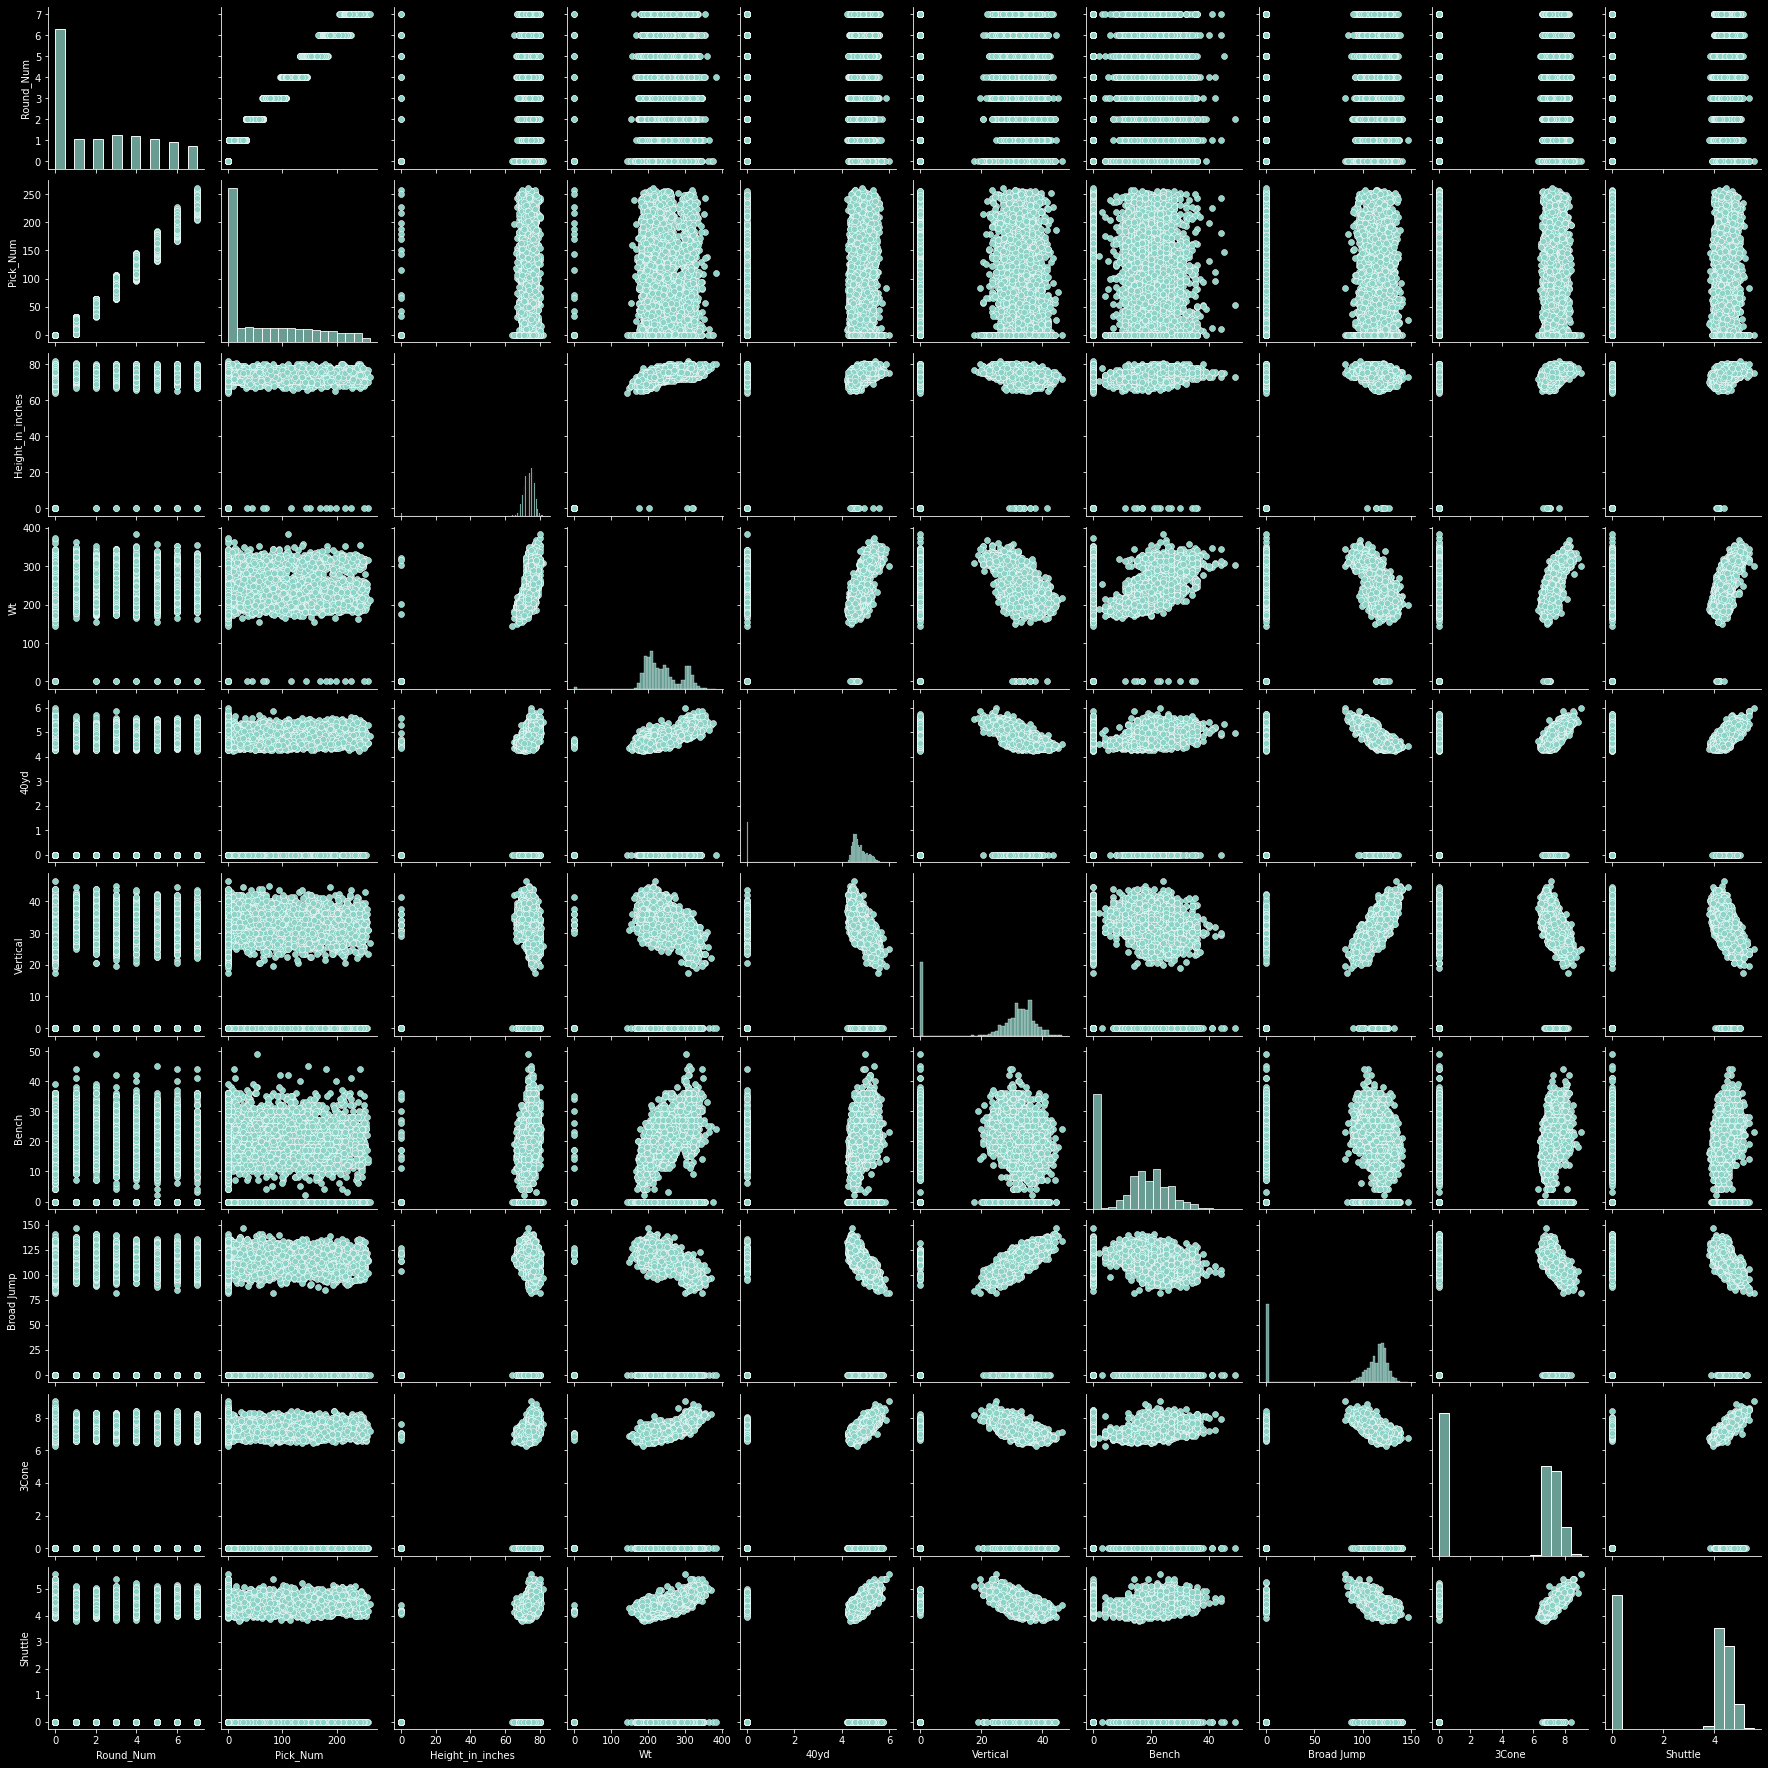

In [219]:
sns.pairplot(combine_df)

In [220]:
speed_df = combine_df[combine_df['40yd']!= 0].sort_values('40yd', ascending=True)
speed_df.head(20)

,Player,Pos,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
2549,John Ross,WR,Washington,Cincinnati Bengals,1,9,2017,71.0,188.0,4.22,37.0,0.0,133.0,0.00,0.00
4430,Kalon Barnes,DB,Baylor,Carolina Panthers,7,242,2022,72.0,183.0,4.23,0.0,0.0,0.0,0.00,0.00
4733,Tariq Woolen,DB,Texas-San Antonio,Seattle Seahawks,5,153,2022,76.0,205.0,4.26,42.0,0.0,0.0,0.00,0.00
1639,Dri Archer,WR,Kent State,Pittsburgh Steelers,3,97,2014,68.0,173.0,4.26,38.0,20.0,122.0,6.86,4.06
4385,DJ Turner,DB,Michigan,Undrafted,0,0,Undrafted,71.0,178.0,4.26,38.5,0.0,131.0,0.00,0.00
3988,Anthony Schwartz,WR,Auburn,Cleveland Browns,3,91,2021,72.0,186.0,4.27,32.0,0.0,123.0,7.13,4.25
3452,Henry Ruggs III,WR,Alabama,Las Vegas Raiders,1,12,2020,71.0,188.0,4.27,42.0,0.0,131.0,0.00,0.00
95,Marquise Goodwin,WR,Texas,Buffalo Bills,3,78,2013,69.0,183.0,4.27,0.0,13.0,132.0,0.00,0.00
3916,Rondale Moore,WR,Purdue,Arizona Cardinals,2,49,2021,67.0,180.0,4.28,42.5,0.0,0.0,6.65,4.06
1062,Demarcus Van Dyke,DB,Miami (FL),Oakland Raiders,3,81,2011,73.0,176.0,4.28,33.5,5.0,121.0,6.97,4.09


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd424aabca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd424a9c250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd424aab9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd424a9c7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd424a9cac0>],
 'means': []}

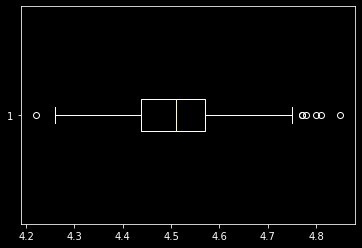

In [221]:
wr_df = speed_df[speed_df['Pos']== 'WR']
plt.boxplot( wr_df['40yd'], vert = False)

Find the drafted players from the University of Maryland and sort them by the highest pick

In [222]:
md_df = speed_df[speed_df['School'] == 'Maryland']
md_df = md_df[md_df['Pick_Num']!=0]
md_df.sort_values('Pick_Num', ascending= True)

,Player,Pos,School,Drafted_Team,Round_Num,Pick_Num,Year,Height_in_inches,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
2888,Darnell Savage,S,Maryland,Green Bay Packers,1,21,2019,71.0,198.0,4.36,39.5,11.0,126.0,7.03,4.14
3167,D.J. Moore,WR,Maryland,Carolina Panthers,1,24,2018,72.0,210.0,4.42,39.5,15.0,132.0,6.95,4.07
1256,Torrey Smith,WR,Maryland,Baltimore Ravens,2,58,2011,73.0,204.0,4.41,41.0,19.0,126.0,6.72,4.13
2041,Sean Davis,DB,Maryland,Pittsburgh Steelers,2,58,2016,73.0,201.0,4.46,37.5,21.0,126.0,6.64,3.97
2189,Yannick Ngakoue,EDGE,Maryland,Jacksonville Jaguars,3,69,2016,74.0,252.0,4.75,34.5,26.0,118.0,7.35,4.50
1840,Dexter McDougle,DB,Maryland,New York Jets,3,80,2014,70.0,196.0,4.47,0.0,0.0,0.0,0.00,0.00
4478,Nick Cross,S,Maryland,Indianapolis Colts,3,96,2022,72.0,212.0,4.34,37.0,0.0,130.0,0.00,0.00
703,Bruce Campbell,OT,Maryland,Oakland Raiders,4,106,2010,78.0,314.0,4.75,32.0,34.0,101.0,7.58,4.69
3503,Anthony McFarland,RB,Maryland,Pittsburgh Steelers,4,124,2020,68.0,208.0,4.44,29.5,0.0,116.0,0.00,0.00
4621,Chigoziem Okonkwo,TE,Maryland,Tennessee Titans,4,143,2022,75.0,238.0,4.52,35.5,0.0,0.0,0.00,0.00


### Correlation Matrix

Utilizing the 40 yard and position data a correlation matrix can be made which shows the correlation of positions and 40 yard times on the interval listed on the X axis

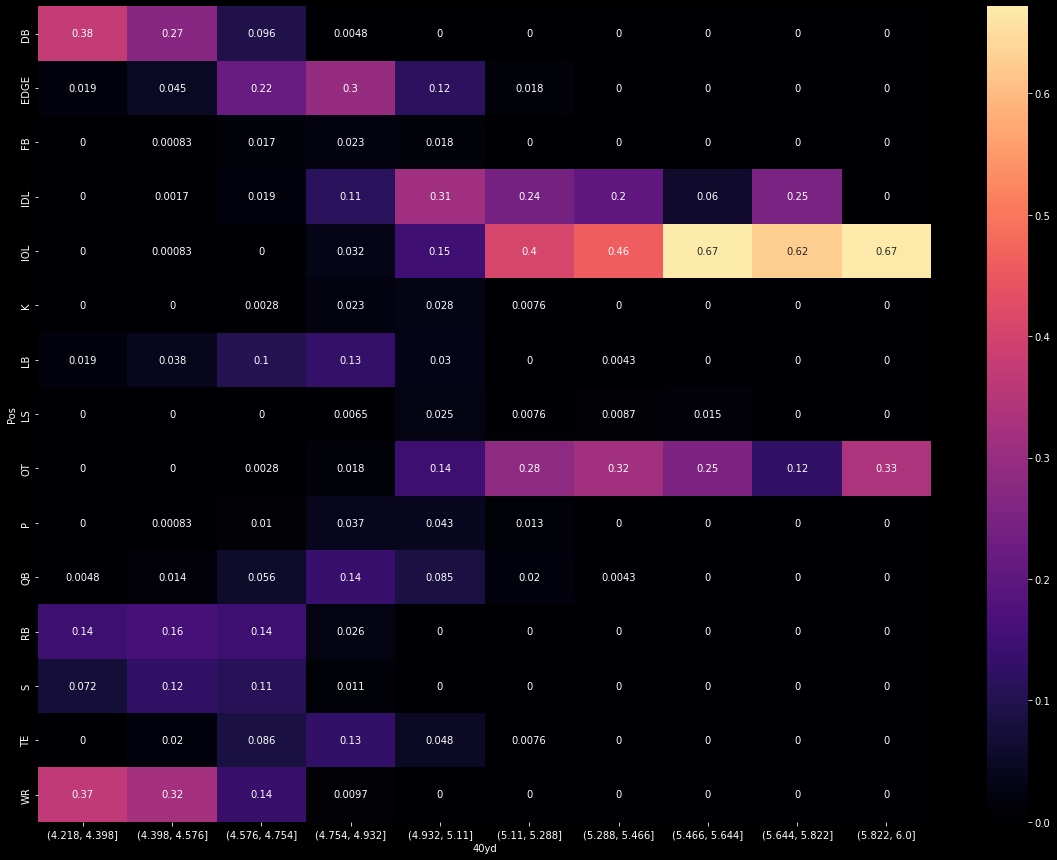

In [223]:
speed_discretized = pd.cut(speed_df['40yd'], bins = 10)
contingency_tbl = pd.crosstab(speed_df.Pos, speed_discretized)
prob_tbl = contingency_tbl/contingency_tbl.sum()
plt.subplots(figsize = (20,15))
sns.heatmap(prob_tbl, annot =True, cmap ='magma',center = .35)
plt.show()

In [224]:
drafted_df = combine_df[combine_df['Round_Num']> 0]
contingency_tbl = pd.crosstab(drafted_df.Round_Num,drafted_df.Pos)
contingency_tbl

Pos,DB,EDGE,FB,IDL,IOL,K,LB,LS,OT,P,QB,RB,S,TE,WR
Round_Num,,,,,,,,,,,,,,,
1,54,67,0,46,36,0,22,0,44,0,40,18,23,10,49
2,54,62,0,41,32,1,20,0,33,0,12,35,33,21,63
3,61,66,0,52,51,0,33,0,33,1,17,33,27,32,56
4,58,61,4,35,46,2,25,0,23,3,20,50,38,32,57
5,56,50,4,42,39,6,32,1,26,7,14,34,32,24,48
6,36,41,5,28,42,3,22,3,20,7,18,39,32,16,51
7,30,52,7,30,24,3,23,0,23,4,16,23,17,21,36


I wanted to see if there would be any major differences between the two correlation matrix, with the second one only inclding those who were drafted

In [225]:
speed_drafted_df = speed_df[speed_df['Round_Num']> 0]

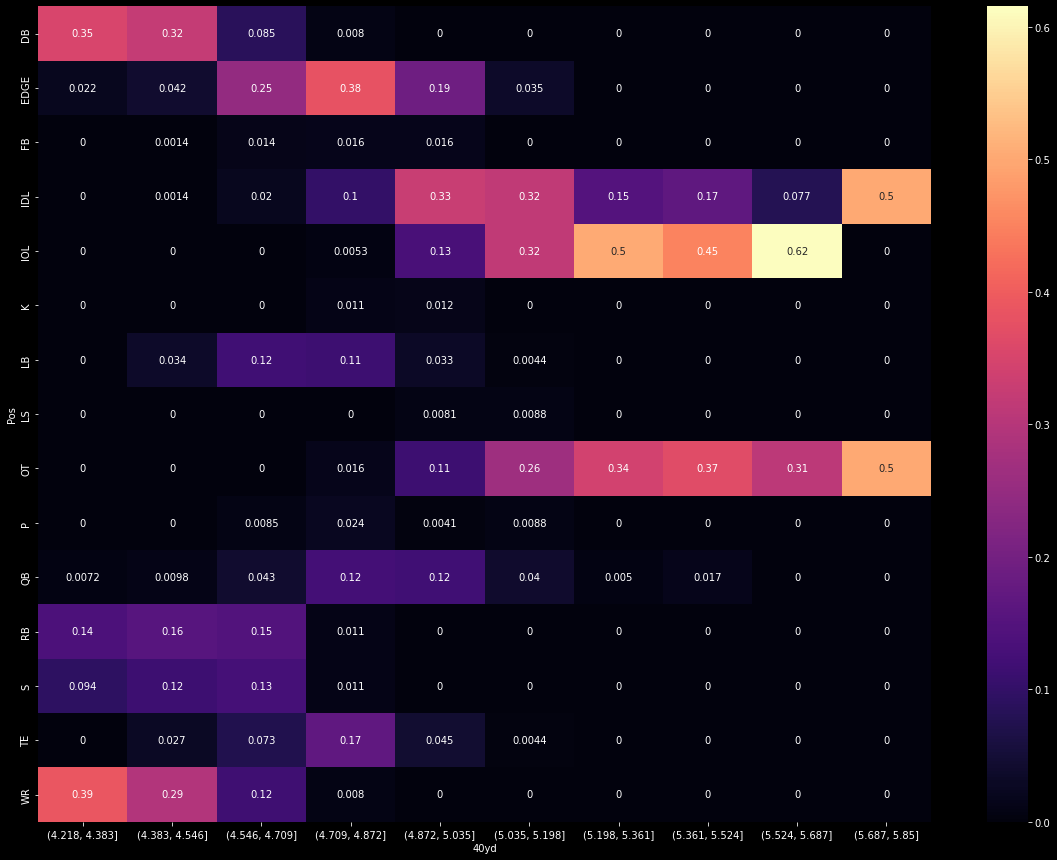

In [226]:
speed_discretized = pd.cut(speed_drafted_df['40yd'], bins = 10)
contingency_tbl = pd.crosstab(speed_drafted_df.Pos, speed_discretized)
prob_tbl = contingency_tbl/contingency_tbl.sum()
plt.subplots(figsize = (20,15))
sns.heatmap(prob_tbl, annot =True, cmap ='magma', center = .3 )
plt.show()

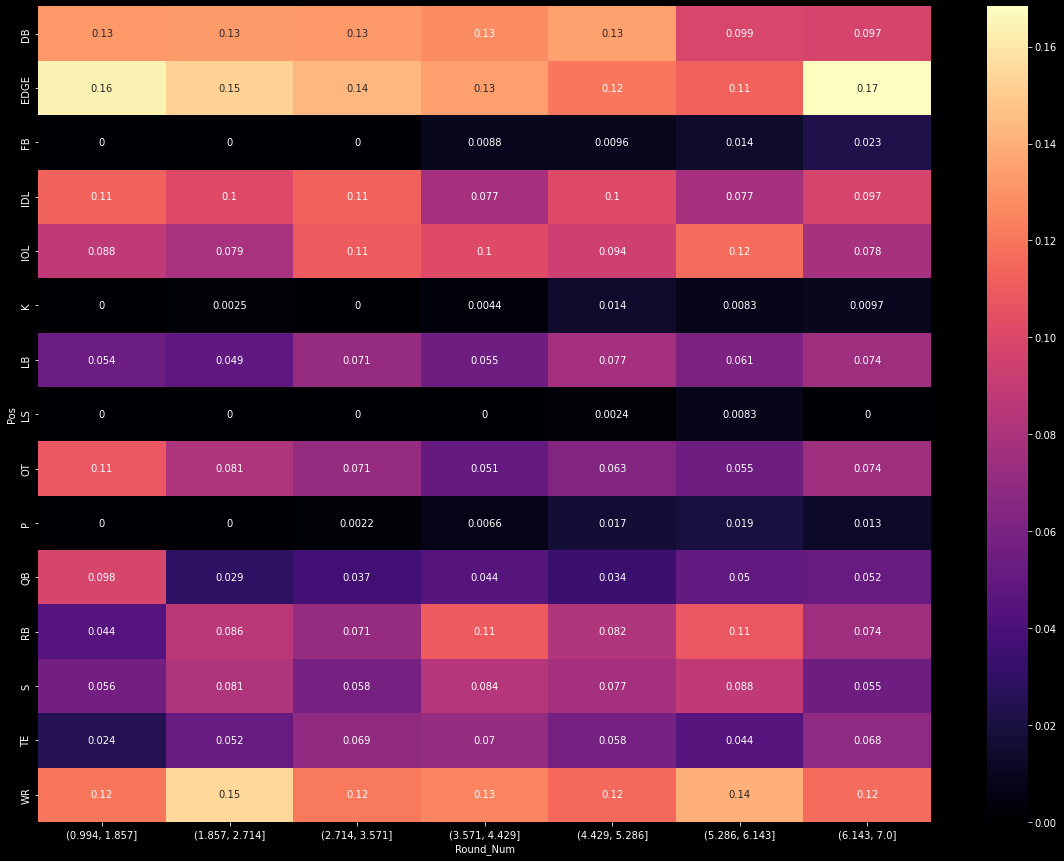

In [233]:
draft_discretized = pd.cut(drafted_df.Round_Num, bins = 7)
contingency_tbl = pd.crosstab(drafted_df.Pos, draft_discretized)
prob_tbl = contingency_tbl/contingency_tbl.sum()
plt.subplots(figsize = (20,15))
sns.heatmap(prob_tbl, annot =True, cmap ='magma' )
plt.show()